In [51]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
from sensor_msgs.msg import PointCloud2, PointField
from std_msgs.msg import Header, Time

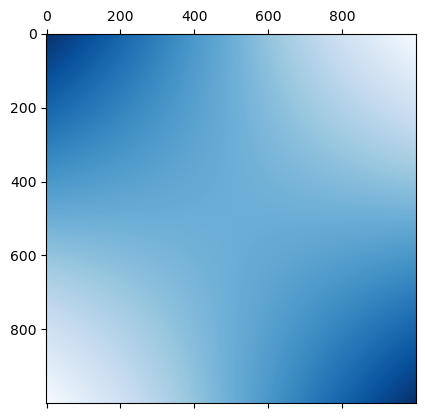

In [52]:
x_dim = 1000
y_dim = 1000

data = np.zeros((y_dim, x_dim, 3))

data[np.arange(y_dim),:,0] = np.linspace(-1, 1, x_dim, dtype=np.float32).reshape((-1,  1))
data[:,np.arange(x_dim),1] = np.linspace(-1, 1, y_dim, dtype=np.float32).reshape(( 1, -1))
data[:,:,2] = data[:,:,0] * data[:,:,1]

fig, ax = plt.subplots()
ax.matshow(data[:,:,2], cmap=plt.cm.Blues)

In [82]:
x_dim       = 171
y_dim       = 224
point_step  = (4*(32) + 16 + 8 )//8

data = np.zeros((y_dim, x_dim, 3), dtype=np.float32)
data[np.arange(y_dim),:,0] = np.linspace(-1, 1, x_dim, dtype=np.float32).reshape((1, -1))
data[:,np.arange(x_dim),1] = np.linspace(-1, 1, y_dim, dtype=np.float32).reshape((-1, 1))
data[:,:,2] = data[:,:,0] * data[:,:,1]

raw_data = np.zeros((y_dim, x_dim, point_step), dtype=np.byte)
raw_data[:,:,np.arange(3*4)] = np.frombuffer(data.tobytes(), dtype=np.byte).reshape((y_dim, x_dim, -1))


In [84]:

def generate_pointcloud(seq: int, time: Time) -> PointCloud2:
    x_dim       = 171
    y_dim       = 224
    point_step  = (4*(32) + 16 + 8 )//8
    
    header          = Header()
    header.seq      = seq
    header.stamp    = time
    header.frame_id = 'pico_flexx_optical_frame'

    point_fields = [
        PointField('x',          0, 7, 1),
        PointField('y',          4, 7, 1),
        PointField('z',          8, 7, 1),
        PointField('noise',     12, 7, 1),
        PointField('intensity', 16, 7, 1),
        PointField('gray',      18, 7, 1),
    ]

    data = np.zeros((y_dim, x_dim, 3), dtype=np.float32)
    data[np.arange(y_dim),:,0] = np.linspace(-1, 1, x_dim, dtype=np.float32).reshape((1, -1))
    data[:,np.arange(x_dim),1] = np.linspace(-1, 1, y_dim, dtype=np.float32).reshape((-1, 1))
    data[:,:,2] = data[:,:,0] * data[:,:,1]

    raw_data = np.zeros((y_dim, x_dim, point_step), dtype=np.byte)
    raw_data[:,:,np.arange(3*4)] = np.frombuffer(data.tobytes(), dtype=np.byte).reshape((y_dim, x_dim, -1))

    cloud              = PointCloud2()
    # fake the data as observed
    cloud.header       = header
    cloud.height       = y_dim
    cloud.width        = x_dim
    cloud.fields       = point_fields
    cloud.is_bigendian = False
    cloud.point_step   = point_step
    cloud.row_step     = 4256
    cloud.data         = raw_data
    
    return cloud

time = Time()
generate_pointcloud(0, time)

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1mUntyped global name 'Header':[0m [1m[1mCannot determine Numba type of <class 'type'>[0m
[1m
File "../../../../tmp/ipykernel_17523/2909983923.py", line 7:[0m
[1m<source missing, REPL/exec in use?>[0m
[0m 

This error may have been caused by the following argument(s):
- argument 1: [1mCannot determine Numba type of <class 'std_msgs.msg._Time.Time'>[0m
